In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import shapiro

In [ ]:
# Load the dataset
cookie = pd.read_csv('/Users/suyeonkim/Documents/IAA/취준/Resume/ncsu format/wells fargo referred/side project/cookie_cats.csv')

cookie.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [2]:
cookie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
cookie.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [4]:
cookie.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [ ]:
# Check if the userid is unique
print(cookie.userid.nunique() == cookie.shape[0])

True


# EDA

In [5]:
cookie.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


In [10]:
cookie.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median       mean         std    max
version retention_1                                             
gate_30 False        24666     6.0  18.379591  319.423232  49854
        True         20034    48.0  94.411700  135.037697   2961
gate_40 False        25370     6.0  16.340402   35.925756   1241
        True         20119    49.0  95.381182  137.887256   2640

In [11]:
cookie.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median        mean         std    max
version retention_7                                              
gate_30 False        36198    11.0   25.796508   43.316158    981
        True          8502   105.0  165.962479  568.000576  49854
gate_40 False        37210    11.0   25.856356   44.406112   2640
        True          8279   111.0  165.649837  183.792499   2294

In [35]:
cookie.groupby("version").retention_1.mean(), cookie.groupby("version").retention_7.mean()

(version
 gate_30    0.448188
 gate_40    0.442283
 Name: retention_1, dtype: float64,
 version
 gate_30    0.190201
 gate_40    0.182000
 Name: retention_7, dtype: float64)

# Sum_gamerounds

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


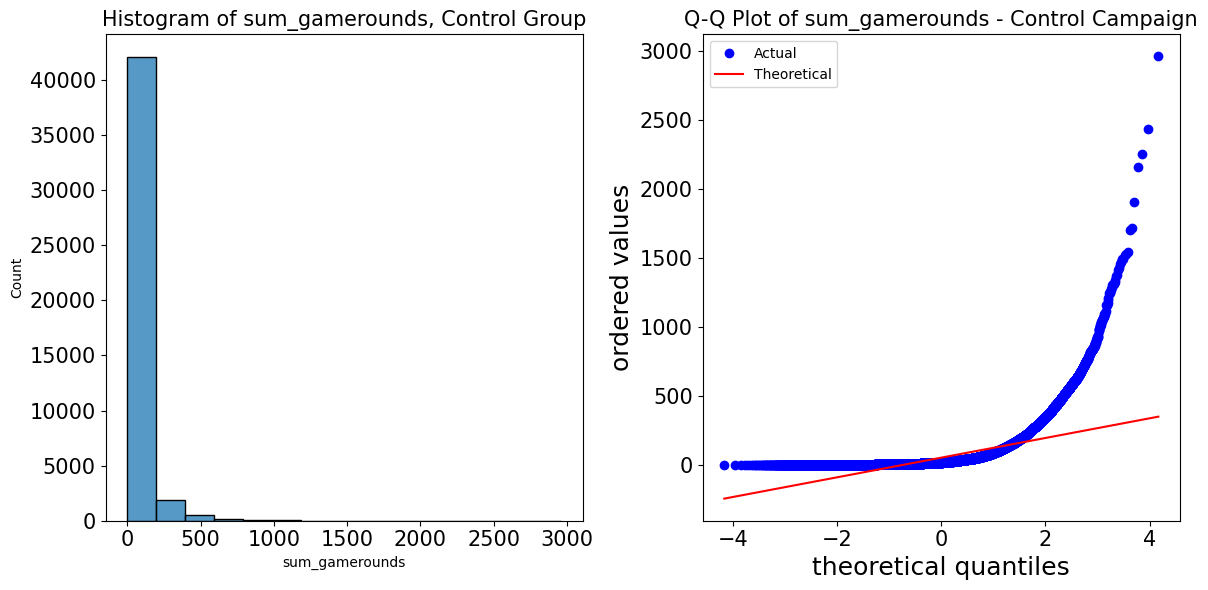

In [20]:
cookie_control = cookie[cookie['version']=='gate_30']
cookie_control = cookie_control[cookie_control['sum_gamerounds']<=40000]
cookie_test = cookie[cookie['version']=='gate_40']


fig,axes = plt.subplots(1,2,figsize=(12,6))

axes[0] = sns.histplot(cookie_control['sum_gamerounds'], bins=15, ax=axes[0])
axes[0].xaxis.set_tick_params(labelsize=15)
axes[0].yaxis.set_tick_params(labelsize=15)
axes[0].set_title(f"Histogram of {'sum_gamerounds'}, Control Group",fontsize=15)

axes[1] = stats.probplot(cookie_control['sum_gamerounds'], dist="norm", plot=plt)
plt.legend(['Actual','Theoretical'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("theoretical quantiles", fontsize=18)
plt.ylabel('ordered values', fontsize=18)
plt.title(f"Q-Q Plot of {'sum_gamerounds'} - Control Campaign", fontsize=15)
plt.tight_layout()            

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


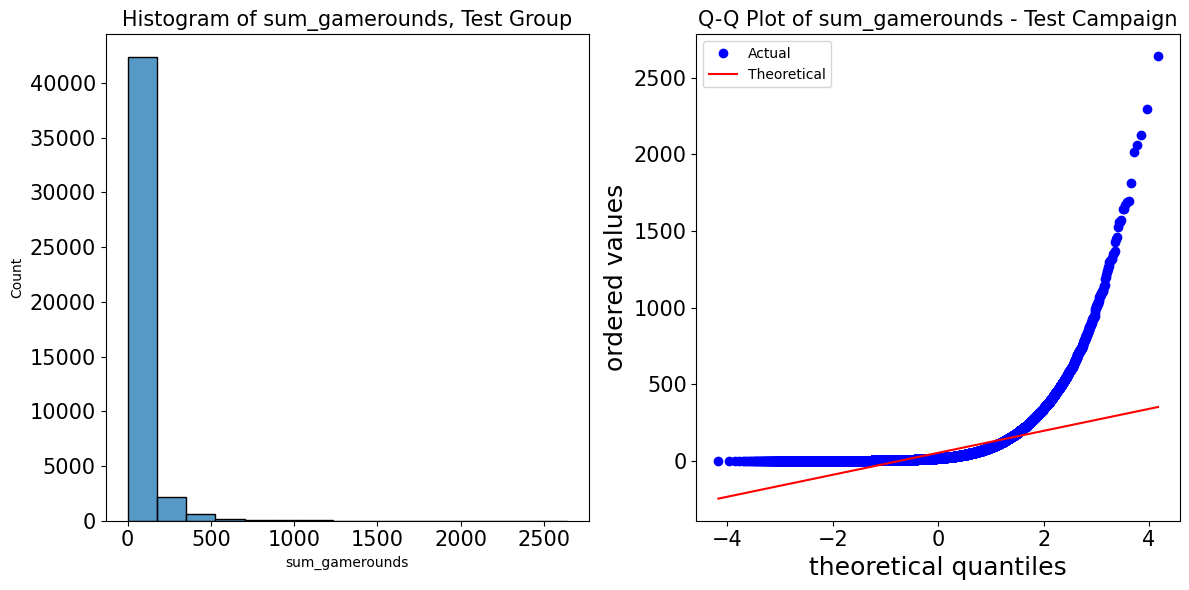

In [21]:

fig,axes = plt.subplots(1,2,figsize=(12,6))

axes[0] = sns.histplot(cookie_test['sum_gamerounds'], bins=15, ax=axes[0])
axes[0].xaxis.set_tick_params(labelsize=15)
axes[0].yaxis.set_tick_params(labelsize=15)
axes[0].set_title(f"Histogram of {'sum_gamerounds'}, Test Group",fontsize=15)

axes[1] = stats.probplot(cookie_test['sum_gamerounds'], dist="norm", plot=plt)
plt.legend(['Actual','Theoretical'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("theoretical quantiles", fontsize=18)
plt.ylabel('ordered values', fontsize=18)
plt.title(f"Q-Q Plot of {'sum_gamerounds'} - Test Campaign", fontsize=15)
plt.tight_layout()            

In [28]:
shapiro_control = shapiro(cookie_control['sum_gamerounds'])[1]
shapiro_test = shapiro(cookie_test['sum_gamerounds'])[1]

print(f"Control p-value: {shapiro_control:.4f}")
print(f"Test    p-value: {shapiro_test:.4f}")


Control p-value: 0.0000
Test    p-value: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


If it was normal,
1) leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True

        2-1) ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
        2-2) ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]

In [31]:
# Non-Parametric Test
stats.mannwhitneyu(cookie_control['sum_gamerounds'], cookie_test['sum_gamerounds'])[1] 

0.05089155279145376

can't tell they are statistically different

In [34]:
import numpy as np
import pandas as pd

def run_bootstrap_ab_test(control_df, test_df, metrics, n_bootstrap=10000):
 
    results = []

    def bootstrap_mean_diff(a, b, n_bootstrap=10000):
        """Generate bootstrap distribution of the difference in means."""
        diffs = []
        for _ in range(n_bootstrap):
            a_sample = np.random.choice(a, size=len(a), replace=True)
            b_sample = np.random.choice(b, size=len(b), replace=True)
            diff = b_sample.mean() - a_sample.mean()
            diffs.append(diff)
        return np.percentile(diffs, [2.5, 97.5]), np.mean(diffs)

 
    # Extract values for control and test groups
    control_vals = np.array(control_df[metrics])
    test_vals = np.array(test_df[metrics])

    # Run bootstrap sampling
    ci, mean_diff = bootstrap_mean_diff(control_vals, test_vals, n_bootstrap)

    # Determine significance: 95% CI should not include zero
    significant = '✅' if ci[0] > 0 or ci[1] < 0 else '❌'

    # Append result
    results.append({
        'Metric': metrics,
        'Mean Difference': round(mean_diff, 2),
        '95% CI': f"[{ci[0]:.2f}, {ci[1]:.2f}]",
        'Significant?': significant
    })

    return pd.DataFrame(results)



# Run the bootstrap A/B test
results_df = run_bootstrap_ab_test(cookie_control, cookie_test, metrics = 'sum_gamerounds')

# Display result
print(results_df)


           Metric  Mean Difference         95% CI Significant?
0  sum_gamerounds            -0.05  [-1.40, 1.30]            ❌


Retention_1 and Retention 7

In [47]:
import numpy as np

ctrl = cookie_control['retention_1'].values
test = cookie_test['retention_1'].values

boot_diffs = []
for _ in range(10000):
    boot_ctrl = np.random.choice(ctrl, size=len(ctrl), replace=True)
    boot_test = np.random.choice(test, size=len(test), replace=True)
    boot_diffs.append(boot_test.mean() - boot_ctrl.mean())

ci_lower, ci_upper = np.percentile(boot_diffs, [2.5, 97.5])
print(f"95% CI for retention diff: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% CI for retention diff: [-0.0124, 0.0006]


In [49]:
mean_diff = cookie_test['retention_1'].mean() - cookie_control['retention_1'].mean()
print(mean_diff)


-0.005915196587034155


In [50]:
p_value = np.mean(np.abs(boot_diffs) >= abs(mean_diff))
print(p_value)

0.499


In [52]:
import numpy as np

ctrl = cookie_control['retention_7'].values
test = cookie_test['retention_7'].values

boot_diffs2 = []
for _ in range(10000):
    boot_ctrl = np.random.choice(ctrl, size=len(ctrl), replace=True)
    boot_test = np.random.choice(test, size=len(test), replace=True)
    boot_diffs2.append(boot_test.mean() - boot_ctrl.mean())

ci_lower, ci_upper = np.percentile(boot_diffs2, [2.5, 97.5])
print(f"95% CI for retention diff: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% CI for retention diff: [-0.0134, -0.0030]


In [ ]:
mean_diff2 = cookie_test['retention_7'].mean() - cookie_control['retention_7'].mean()
p_value2 = np.mean(np.abs(boot_diffs2) >= abs(mean_diff2))
print(p_value2)


0.4998


In [41]:
# Control group
n_control = cookie_control.shape[0]                  # All the users
p_control = cookie_control['retention_1'].mean()     # Retention Rate
np_control = n_control * p_control
n1_minus_p_control = n_control * (1 - p_control)

# Test group
n_test = cookie_test.shape[0]
p_test = cookie_test['retention_1'].mean()
np_test = n_test * p_test
n1_minus_p_test = n_test * (1 - p_test)

# print
print("Control group:")
print(f"np = {np_control:.2f}, n(1-p) = {n1_minus_p_control:.2f}")
print("Test group:")
print(f"np = {np_test:.2f}, n(1-p) = {n1_minus_p_test:.2f}")


Control group:
np = 20034.00, n(1-p) = 24665.00
Test group:
np = 20119.00, n(1-p) = 25370.00


In [38]:
from statsmodels.stats.proportion import proportions_ztest

success = [
    cookie_control['retention_1'].sum(), 
    cookie_test['retention_1'].sum()
]
nobs = [
    cookie_control.shape[0],
    cookie_test.shape[0]
]

z_stat, p_value = proportions_ztest(success, nobs)
print(f"Z = {z_stat:.4f}, p = {p_value:.4f}")


Z = 1.7871, p = 0.0739


In [39]:
from statsmodels.stats.proportion import proportions_ztest

success = [
    cookie_control['retention_7'].sum(), 
    cookie_test['retention_7'].sum()
]
nobs = [
    cookie_control.shape[0],
    cookie_test.shape[0]
]

z_stat, p_value = proportions_ztest(success, nobs)
print(f"Z = {z_stat:.4f}, p = {p_value:.4f}")


Z = 3.1574, p = 0.0016


In [44]:
print(cookie_control['retention_7'].sum()/cookie_control.shape[0])
print(cookie_test['retention_7'].sum()/cookie_test.shape[0])

0.19018322557551623
0.18200004396667327
